In [243]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [401]:
# Hyper-parameters
INPUT_SIZE = 1
OUTPUT_SIZE = 1
NUM_EPOCHS = 100
LEARNING_RATE = 0.1
BATCH_SIZE = 16
n = 150

In [408]:
# Toy dataset
x_train = np.linspace(0, n, n).astype(np.float32).reshape((-1,1))
# Scale the inputs; failing to do this results in NaN values for the loss.
x_train = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train))
y_train = x_train * x_train * x_train + np.random.normal(0,.2, n).astype(np.float32).reshape((-1,1))
y_train = (y_train - np.min(y_train))/(np.max(y_train) - np.min(y_train))

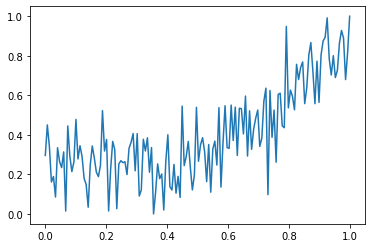

In [409]:
plt.plot(x_train, y_train)

In [410]:
# Linear regression model
model = nn.Linear(INPUT_SIZE, OUTPUT_SIZE)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)  

In [411]:
# Train the model
for epoch in range(NUM_EPOCHS):
    
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE/(epoch+1))
    permutation = torch.randperm(torch.from_numpy(x_train).size()[0])
    
    for i in range(0,torch.from_numpy(x_train).size()[0], BATCH_SIZE):
    
        indices = permutation[i:i+BATCH_SIZE]
        inputs, targets = x_train[indices], y_train[indices]
    
        # Convert numpy arrays to torch tensors
        inputs = torch.from_numpy(inputs)
        targets = torch.from_numpy(targets)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
    
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, loss.item()))

Epoch [5/100], Loss: 0.0286
Epoch [10/100], Loss: 0.0250
Epoch [15/100], Loss: 0.0355
Epoch [20/100], Loss: 0.0209
Epoch [25/100], Loss: 0.0264
Epoch [30/100], Loss: 0.0201
Epoch [35/100], Loss: 0.0347
Epoch [40/100], Loss: 0.0255
Epoch [45/100], Loss: 0.0327
Epoch [50/100], Loss: 0.0244
Epoch [55/100], Loss: 0.0124
Epoch [60/100], Loss: 0.0390
Epoch [65/100], Loss: 0.0389
Epoch [70/100], Loss: 0.0179
Epoch [75/100], Loss: 0.0217
Epoch [80/100], Loss: 0.0037
Epoch [85/100], Loss: 0.0364
Epoch [90/100], Loss: 0.0329
Epoch [95/100], Loss: 0.0276
Epoch [100/100], Loss: 0.0258


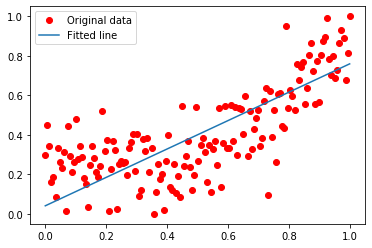

In [412]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()